## ACTIVIDAD 6: REDES NEURONALES
# EQUIPO 6

HORA CLASE: MARTES N4, N5, N6

Integrantes:

Jared Jesus Diaz Juarez 2077828

Rolando Vera Domínguez 2005010

Daniel Alberto Silva Moreno 1868223

Maria Fernanda Campos Carrazco 2015715

Alberto Gómez Vázquez 1996158

In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:

train_images, test_images = train_images / 255.0, test_images / 255.0

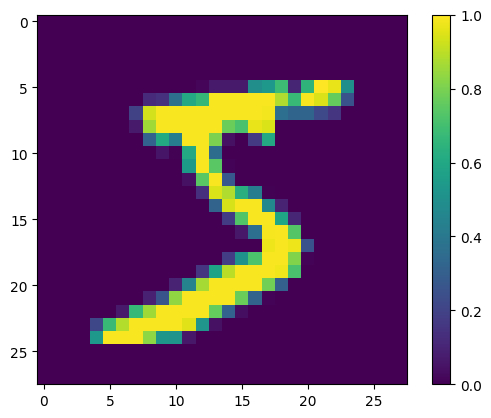

In [5]:
class_names = ['cero', 'uno', 'dos', 'tres', 'cuatro',
               'cinco', 'seis', 'siete', 'ocho', 'nueve']
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

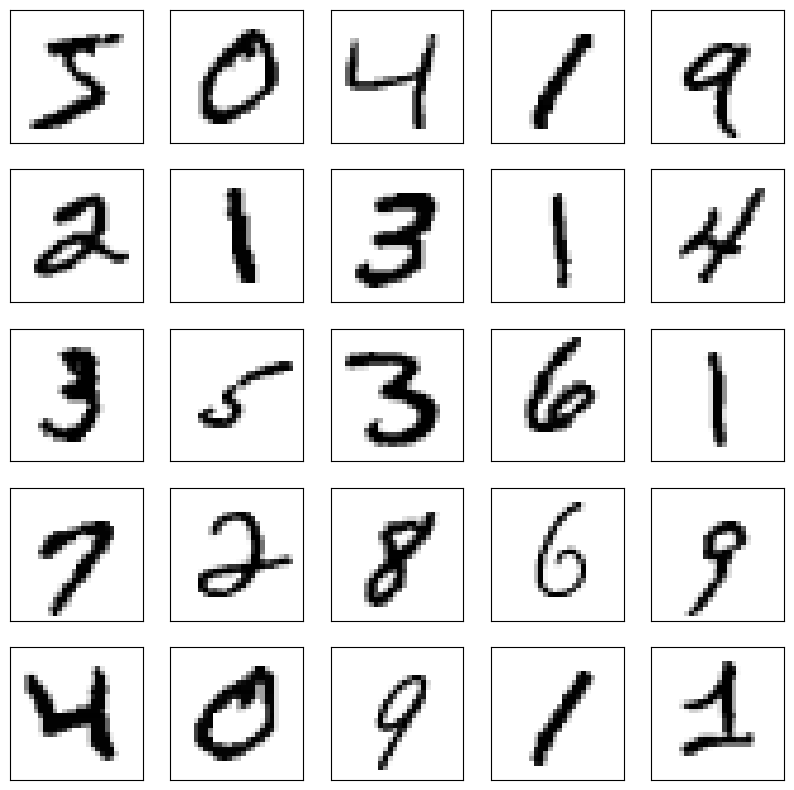

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)

plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 87s 45ms/step - loss: 0.1369 - accuracy: 0.9569 - val_loss: 0.0437 - val_accuracy: 0.9871
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0409 - val_accuracy: 0.9878
Epoch 3/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0277 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0254 - accuracy: 0.9919 - val_loss: 0.0355 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0303 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.0337 - val_accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0141 - accuracy: 0.9953 - val_loss: 0.0289 - val_accura

313/313 - 2s - loss: 0.0560 - accuracy: 0.9885 - 2s/epoch - 8ms/step


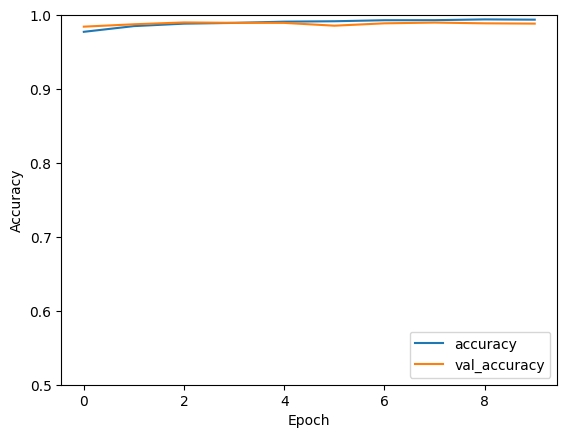

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [19]:
print('\n Exactitud en el conjunto de prueba')
print(test_acc)


 Exactitud en el conjunto de prueba
0.9884999990463257


In [20]:
# Realizar predicciones con el conjunto de datos de prueba
predictions = model.predict(test_images)

# Mostrar 5 predicciones junto con sus valores reales
for i in range(5):
    predicted_label = tf.argmax(predictions[i])
    true_label = test_labels[i]
    print("Predicción:", predicted_label.numpy(), "| Valor real:", true_label)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 4s 14ms/step
Predicción: 7 | Valor real: 7
Predicción: 2 | Valor real: 2
Predicción: 1 | Valor real: 1
Predicción: 0 | Valor real: 0
Predicción: 4 | Valor real: 4


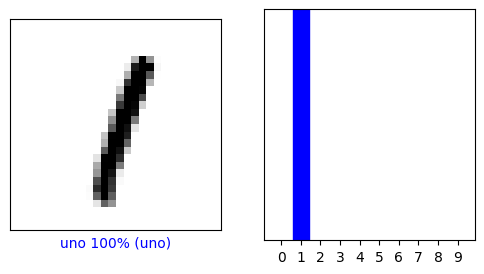

In [21]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

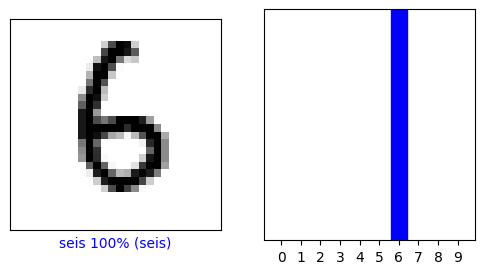

In [22]:
i = 21
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

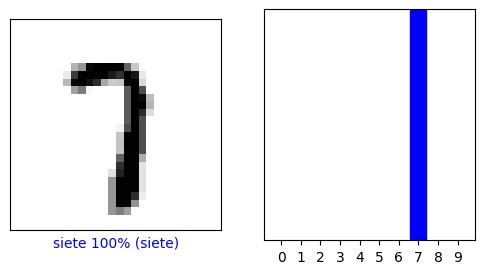

In [23]:
i = 255
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

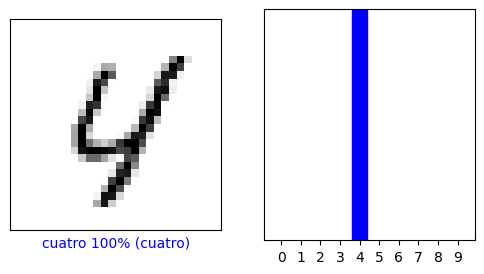

In [24]:
i = 555
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


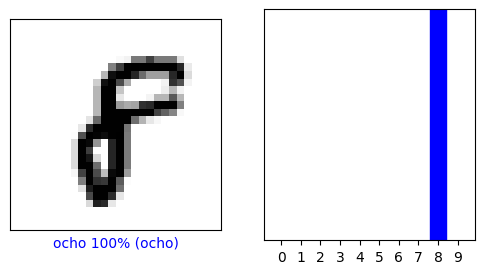

In [25]:
i = 355
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

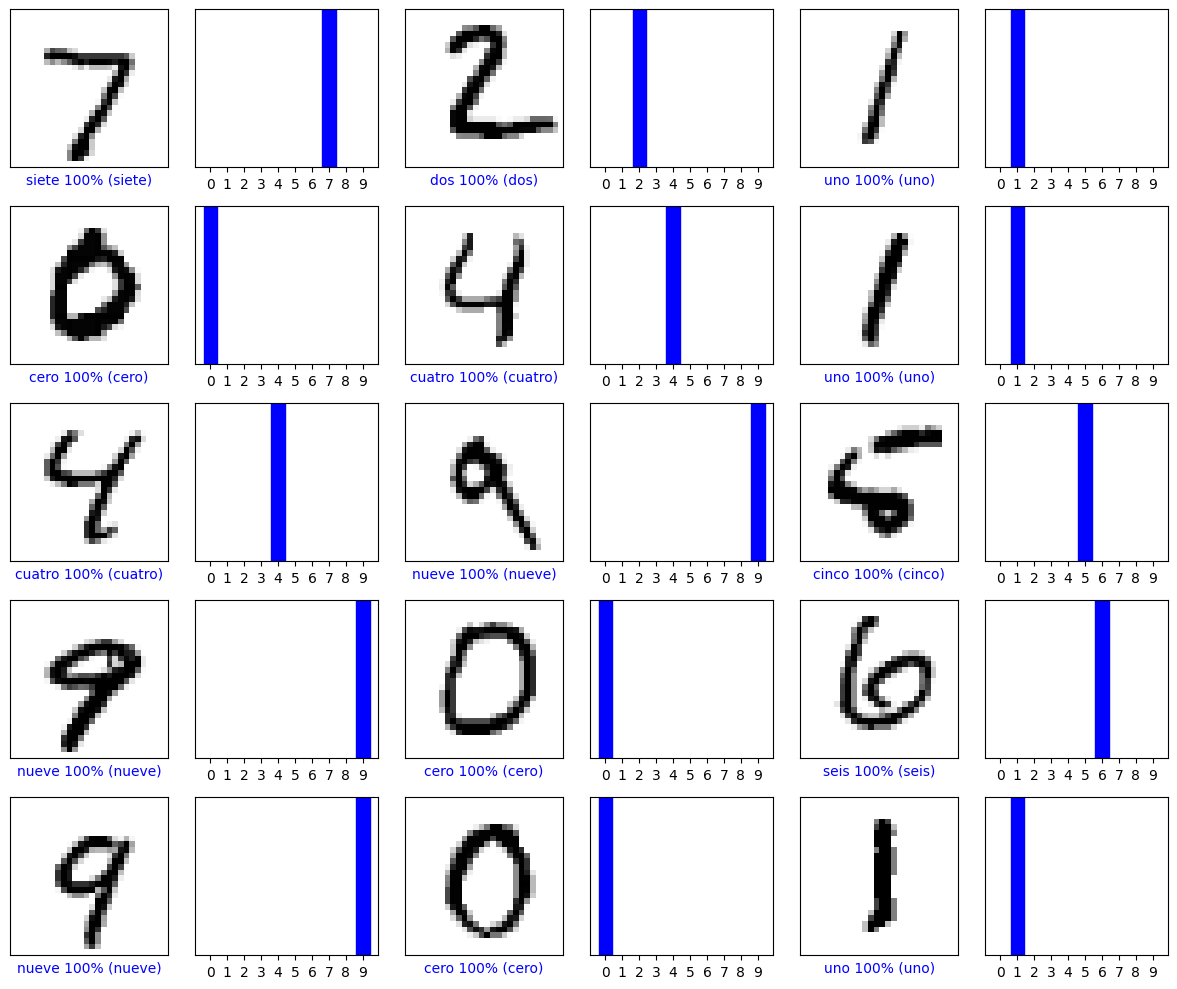

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# **¿Cuantas épocas usaste para mejorar el rendimiento del modelo en comparacion con la red neuronal prealimentada de la actividad 5?**
Para poder tener un mejor rendimiento en comparacion con el de la actividad 5, se utilizaron 6 épocas en esta activadad como base de entrenamiento.

# **¿Obtuviste un mejor rendimiento con este metodo o con el de la actividad 5?¿Porque?**
Si se obtuvo un mejor rendimiento , ya que en esta actividad utilizamos una red neuronal convolucional las cuales son muy utiles para tareas de vision, como por ejemplo reconocimiento de imagenes, capturar patrones de imagenes, captar diferencias en las imagenes que no son percebidas a simple vista, etc. Y en la actividad 5 se utilizo una red neuronal prealimentada estandar, que esta es muchisimo mas sencilla a la hora de recopilar los datos y a la hora de entrenarlo.